In [1]:
# Import data
import pandas as pd
df_y = pd.read_csv('your path/paper_info.csv', header=0, encoding='utf-8')

### Here are the visualization code for the figures in the main text. 
### Following these are the calculation scripts for affiliation diversity (Entropy), Randomized Model, and Affiliation Contribution.

# fig 2

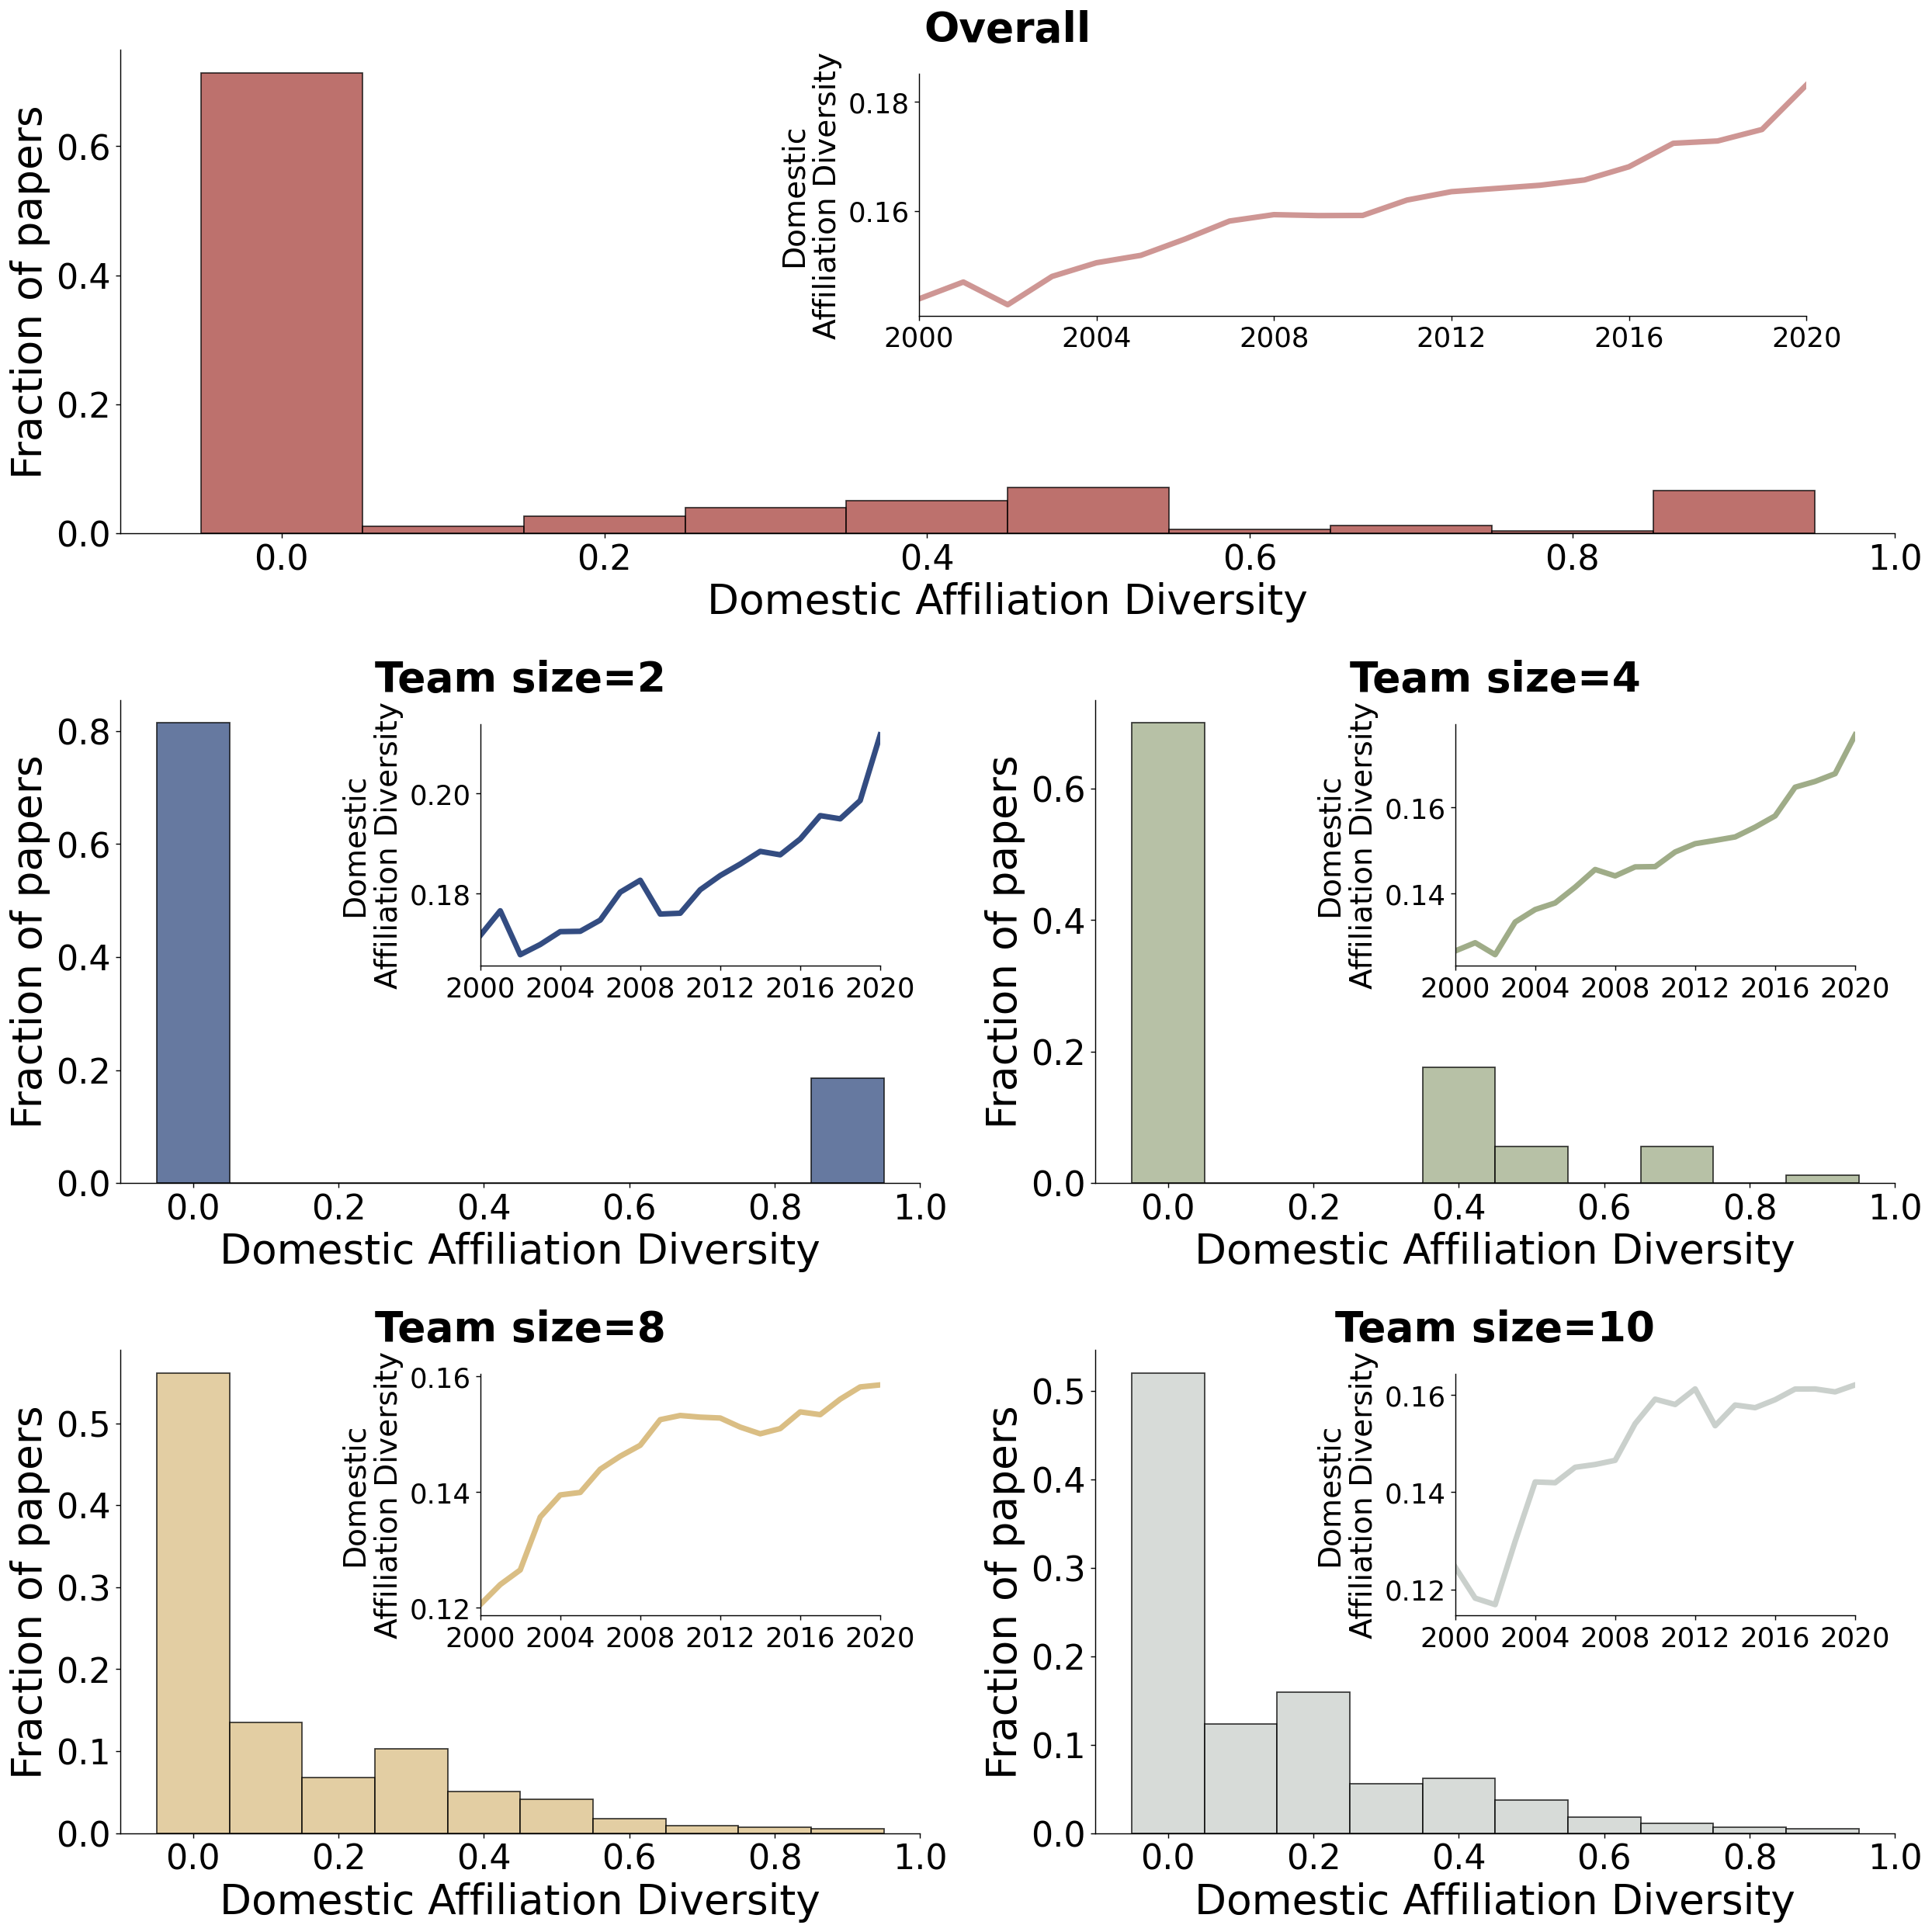

In [5]:
# fig 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define a list of colors for plotting
co = ["#334c81", "#9FAC88", "#DABE84", "#CAD0CC", "#a7413c", "#63BBB0", "#E47159", "#F9AE48", "#7976A2"]

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.sans-serif'] = ["DejaVu Sans"]
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 25})

# Define the bins for the histogram
bins = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Define a function to create bar plots
# ax: The subplot axis where the bar plot will be drawn
# data: The data array for which the bar plot is to be created
# bins: The bins for the histogram calculation
# color: The color of the bars
# label: The label for the bar plot
def create_bar_plot(ax, data, bins, color, label):
    # Calculate the histogram counts and bin edges
    counts, _ = np.histogram(data, bins=bins)
    # Calculate the fractions of papers in each bin
    fractions = counts / data.size
    # Draw the bar plot
    ax.bar(bins[:-1], fractions, width=np.diff(bins), color=color, edgecolor='black', label=label, alpha=0.75)
    # Set the x-axis label
    ax.set_xlabel('Domestic Affiliation Diversity', fontdict={'family': 'DejaVu Sans','size': 30})
    # Set the y-axis label
    ax.set_ylabel('Fraction of papers', fontdict={'family': 'DejaVu Sans','size': 30})
    # Set the tick label size
    ax.tick_params(labelsize=25)
    # Set the title of the subplot
    ax.set_title(f"{label}", fontsize=30, fontweight="bold")
    # Hide the right and top spines of the subplot
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Define a function to create line plots
# ax: The subplot axis where the line plot will be drawn
# df_y: The DataFrame containing the data
# teamsize: The team size for which the line plot is to be created
# color: The color of the line
# marker: The marker style for the data points on the line
def create_line_plot(ax, df_y, teamsize, color, marker):
    # Group the data by publication year and calculate the mean and standard error of the 'entropy_right' column
    yearly_stats = df_y[df_y["teamsize"] == teamsize].groupby('year')["affiliation_diversity"].agg(['mean','sem'])
    # Get the years from the grouped data
    years = yearly_stats.index
    # Get the mean values from the grouped data
    means = yearly_stats['mean']
    # Draw the line plot
    ax.plot(years, means, color=color, linewidth=4, linestyle='-', marker=marker, markersize=10, label=f"Team size={teamsize}")
    # Set the x-axis limits
    ax.set_xlim(2000, 2020)
    # Set the x-axis tick locations
    ax.set_xticks(range(2000, 2021, 4))
    # Set the tick label size
    ax.tick_params(labelsize=20)
    # Set the y-axis label
    ax.set_ylabel('Domestic\nAffiliation Diversity', fontdict={'family': 'DejaVu Sans','size': 22})
    # Hide the right and top spines of the subplot
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Define a function to plot the overall data
# ax: The subplot axis where the overall plot will be drawn
# df_y: The DataFrame containing the data
# color: The color for the overall bar plot and line plot in the inset
def create_overall_plot(ax, df_y, color):
    # Define the bins for the overall histogram
    bins = np.arange(0, 1.1, 0.1)
    # Create the overall bar plot
    create_bar_plot(ax, df_y["affiliation_diversity"], bins, color, "Overall")
    # Create an inset axis
    inset_ax = ax.inset_axes([0.45, 0.45, 0.5, 0.5])
    # Group the data by publication year and calculate the mean and standard error of the 'entropy_right' column
    yearly_stats = df_y.groupby('year')["affiliation_diversity"].agg(['mean','sem'])
    # Get the years from the grouped data
    years = yearly_stats.index
    # Get the mean values from the grouped data
    means = yearly_stats['mean']
    # Draw the line plot in the inset
    inset_ax.plot(years, means, color=color, alpha=0.55, linewidth=4, linestyle='-', markersize=10)
    # Set the x-axis limits of the inset
    inset_ax.set_xlim(2000, 2020)
    # Set the x-axis tick locations of the inset
    inset_ax.set_xticks(range(2000, 2021, 4))
    # Set the tick label size of the inset
    inset_ax.tick_params(labelsize=20)
    # Set the y-axis label of the inset
    inset_ax.set_ylabel('Domestic\nAffiliation Diversity', fontdict={'family': 'DejaVu Sans','size': 22})
    # Hide the right and top spines of the inset
    inset_ax.spines['right'].set_visible(False)
    inset_ax.spines['top'].set_visible(False)
    # Hide the right and top spines of the main subplot
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Create the main figure with a specified DPI and size, and set the face color to white
fig = plt.figure(dpi=128, figsize=(20, 20))
fig.patch.set_facecolor('white')

# Add the overall plot at the top of the figure
top_ax = fig.add_subplot(3, 2, (1, 2))
create_overall_plot(top_ax, df_y, co[4])

# Add the rest of the subplots in a 2x2 grid
gs = fig.add_gridspec(3, 2)
axs = [fig.add_subplot(gs[i, j]) for i in range(1, 3) for j in range(2)]

# Prepare data for bar plots
bar_data = [
    (df_y[df_y["teamsize"] == 2]["affiliation_diversity"], co[0], "Team size=2"),
    (df_y[df_y["teamsize"] == 4]["affiliation_diversity"], co[1], "Team size=4"),
    (df_y[df_y["teamsize"] == 8]["affiliation_diversity"], co[2], "Team size=8"),
    (df_y[df_y["teamsize"] == 10]["affiliation_diversity"], co[3], "Team size=10"),
]

# Create bar plots with embedded line plots in the insets
for ax, (data, color, label) in zip(axs, bar_data):
    create_bar_plot(ax, data, bins, color, label)
    inset_ax = ax.inset_axes([0.45, 0.45, 0.5, 0.5])
    create_line_plot(inset_ax, df_y, int(label.split('=')[1]), color, '')
    inset_ax.spines['right'].set_visible(False)
    inset_ax.spines['top'].set_visible(False)

# Adjust the layout of the subplots to avoid overlapping
plt.tight_layout()

# Display the figure
plt.show()



# fig 3

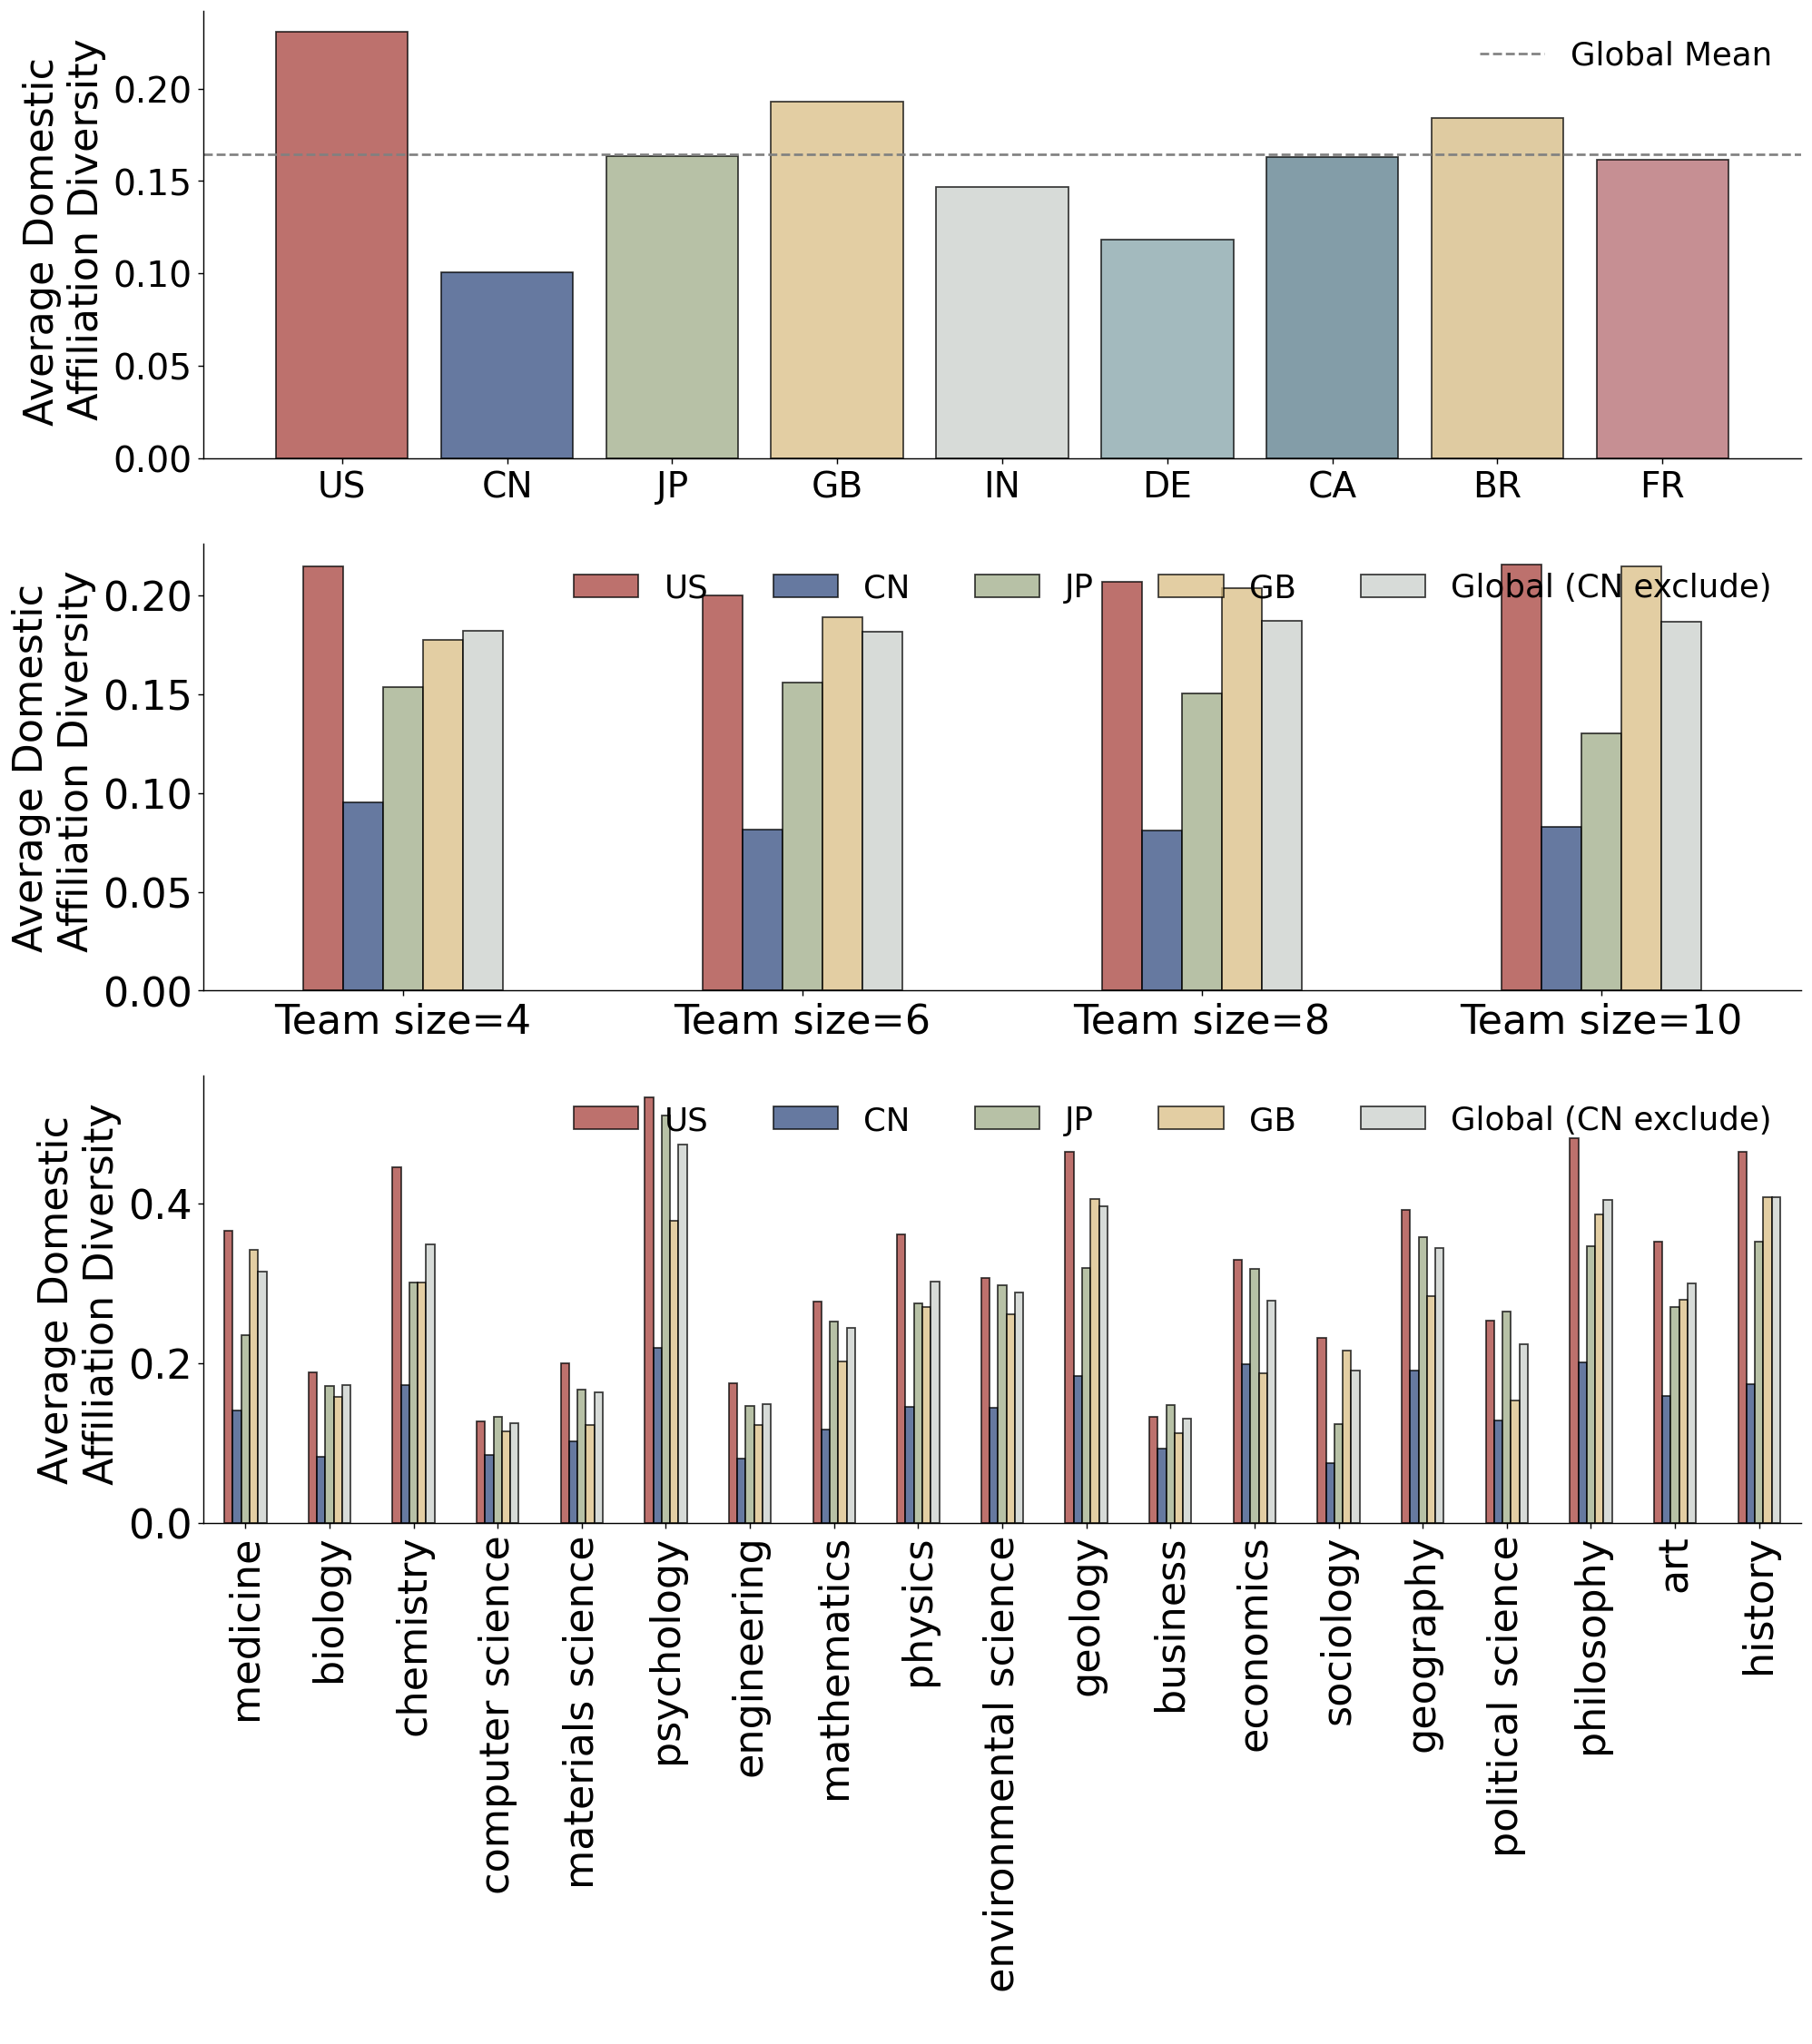

In [8]:
#fig 3
import matplotlib.pyplot as plt
import pandas as pd

# Define colors and configure matplotlib

co = ["#a7413c", "#334c81", "#9FAC88", "#DABE84", "#CAD0CC", "#84A3A9", "#597C8B", "#d5ba82", "#B36A6F"]

# Set the fontset for mathematical text to 'cm'
plt.rcParams['mathtext.fontset'] = 'cm'
# Set the sans-serif font to "Times New Roman"
plt.rcParams['font.sans-serif'] = ["DejaVu Sans"]
# Disable special handling of minus signs on axes
plt.rcParams['axes.unicode_minus'] = False
# Update the default font size to 20
plt.rcParams.update({'font.size': 20})

# Plot 1: Bar chart with overall mean dashed line
# Select the top countries (here directly specified the list of countries)
top_categories = ['US', 'CN', 'JP', 'GB', 'IN', 'DE', 'CA', 'BR', 'FR']
# Calculate the mean of 'entropy_right' column for each selected country
category_means = df_y[df_y['country'].isin(top_categories)].groupby('country')['affiliation_diversity'].mean().reindex(top_categories)
# Calculate the overall mean of the 'entropy_right' column for all data
overall_mean = df_y["affiliation_diversity"].mean()

# Plot 2: Bar chart, team size and country
# List of countries to analyze
desired_values = ['US', 'CN', "JP", 'GB']
# Filter the data to include only the desired countries
df_3_country = df_y[df_y['country'].isin(desired_values)]
# Values of team sizes to analyze
top_n_values = [4, 6, 8, 10]
# String representations of team sizes
top_n_values1 = ["Team size=4", "Team size=6", "Team size=8", "Team size=10"]
# Further filter the data to include only the specified team sizes
subset_df = df_3_country[df_3_country['teamsize'].isin(top_n_values)]
# Calculate the mean of 'entropy_right' for each combination of team size and country, and reshape the result into a table
means_teamsize = subset_df.groupby(['teamsize', 'country'])['affiliation_diversity'].mean().unstack()
# Calculate the mean of other countries excluding China (CN)
mean_except_cn = means_teamsize.drop(columns=['CN']).mean(axis=1)
# Add a column representing the global mean excluding China
means_teamsize["Global (CN exclude)"] = mean_except_cn
# Rearrange the columns
means_teamsize = means_teamsize[['US', 'CN', "JP", 'GB', "Global (CN exclude)"]]

# Plot 3: Bar chart, country and level string
# Select the 19 most frequent values of the 'level_string' column
top_n_values_level = df_y['field_string'].value_counts().nlargest(19).index.tolist()
# Filter the data to include only the selected 'level_string' values
subset_df_level = df_3_country[df_3_country['field_string'].isin(top_n_values_level)]
# Calculate the mean of 'entropy_right' for each combination of 'level_string' and country, and reshape the result into a table
means_level = subset_df_level.groupby(['field_string', 'country'])['affiliation_diversity'].mean().unstack()
# Calculate the mean of other countries excluding China (CN)
mean_except_cn_level = means_level.drop(columns=['CN']).mean(axis=1)
# Add a column representing the global mean excluding China
means_level["Global (CN exclude)"] = mean_except_cn_level
# Rearrange the columns
means_level = means_level[['US', 'CN', "JP", 'GB', "Global (CN exclude)"]]

# Set the x-axis tick indexes
column_indexes = top_n_values_level

# Create a main figure with three subplots
# Create a subplot layout with 3 rows and 1 column, set the figure size and resolution
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18), dpi=128)
# Set the face color of the figure to white
fig.patch.set_facecolor('white')

# Subplot 1
# Plot the bar chart
axes[0].bar(category_means.index, category_means, color=co[:len(category_means)], edgecolor='black', alpha=0.75)
# Draw a dashed line representing the overall mean
axes[0].axhline(overall_mean, color='grey', linestyle='--', label="Global Mean")
# Set the tick label size
axes[0].tick_params(labelsize=22)
# Set the y-axis label
axes[0].set_ylabel('Average Domestic \n Affiliation Diversity', fontsize=25)
# Set the legend
axes[0].legend(ncol=1, frameon=False, fontsize=20)
# Hide the right spine
axes[0].spines['right'].set_visible(False)
# Hide the top spine
axes[0].spines['top'].set_visible(False)
# Turn off the gridlines
axes[0].grid(False)

# Subplot 2
# Plot the bar chart
means_teamsize.plot(kind='bar', color=co[:len(means_teamsize.columns)], alpha=0.75, edgecolor='black', ax=axes[1])
# Set the x-axis label (empty string)
axes[1].set_xlabel('', fontsize=22)
# Set the y-axis label
axes[1].set_ylabel('Average Domestic\n Affiliation Diversity', fontsize=25)
# Set the x-axis tick label size and rotation angle
axes[1].tick_params(axis='x', labelsize=25, rotation=0)
# Set the y-axis tick label size
axes[1].tick_params(axis='y', labelsize=25)
# Set the x-axis tick labels
axes[1].set_xticklabels(top_n_values1)
# Set the legend
axes[1].legend(ncol=6, loc=1, frameon=False, fontsize=20)
# Hide the right spine
axes[1].spines['right'].set_visible(False)
# Hide the top spine
axes[1].spines['top'].set_visible(False)
# Turn off the gridlines
axes[1].grid(False)

# Subplot 3
# Plot the bar chart
means_level.plot(kind='bar', color=co[:len(means_level.columns)], alpha=0.75, edgecolor='black', ax=axes[2])
# Set the x-axis label (with a space)
axes[2].set_xlabel(' ', fontsize=22)
# Set the y-axis label
axes[2].set_ylabel('Average Domestic\n Affiliation Diversity', fontsize=25)
# Set the x-axis tick label size and rotation angle
axes[2].tick_params(axis='x', labelsize=25, rotation=90)
# Set the y-axis tick label size
axes[2].tick_params(axis='y', labelsize=25)
# Set the legend
axes[2].legend(ncol=6, loc=1, frameon=False, fontsize=20)
# Set the x-axis tick labels
axes[2].set_xticklabels(column_indexes)
# Hide the right spine
axes[2].spines['right'].set_visible(False)
# Hide the top spine
axes[2].spines['top'].set_visible(False)
# Turn off the gridlines
axes[2].grid(False)

# Adjust the subplot layout to avoid overlapping
plt.tight_layout()

plt.show()


# fig 4

# fig 4a & 4b

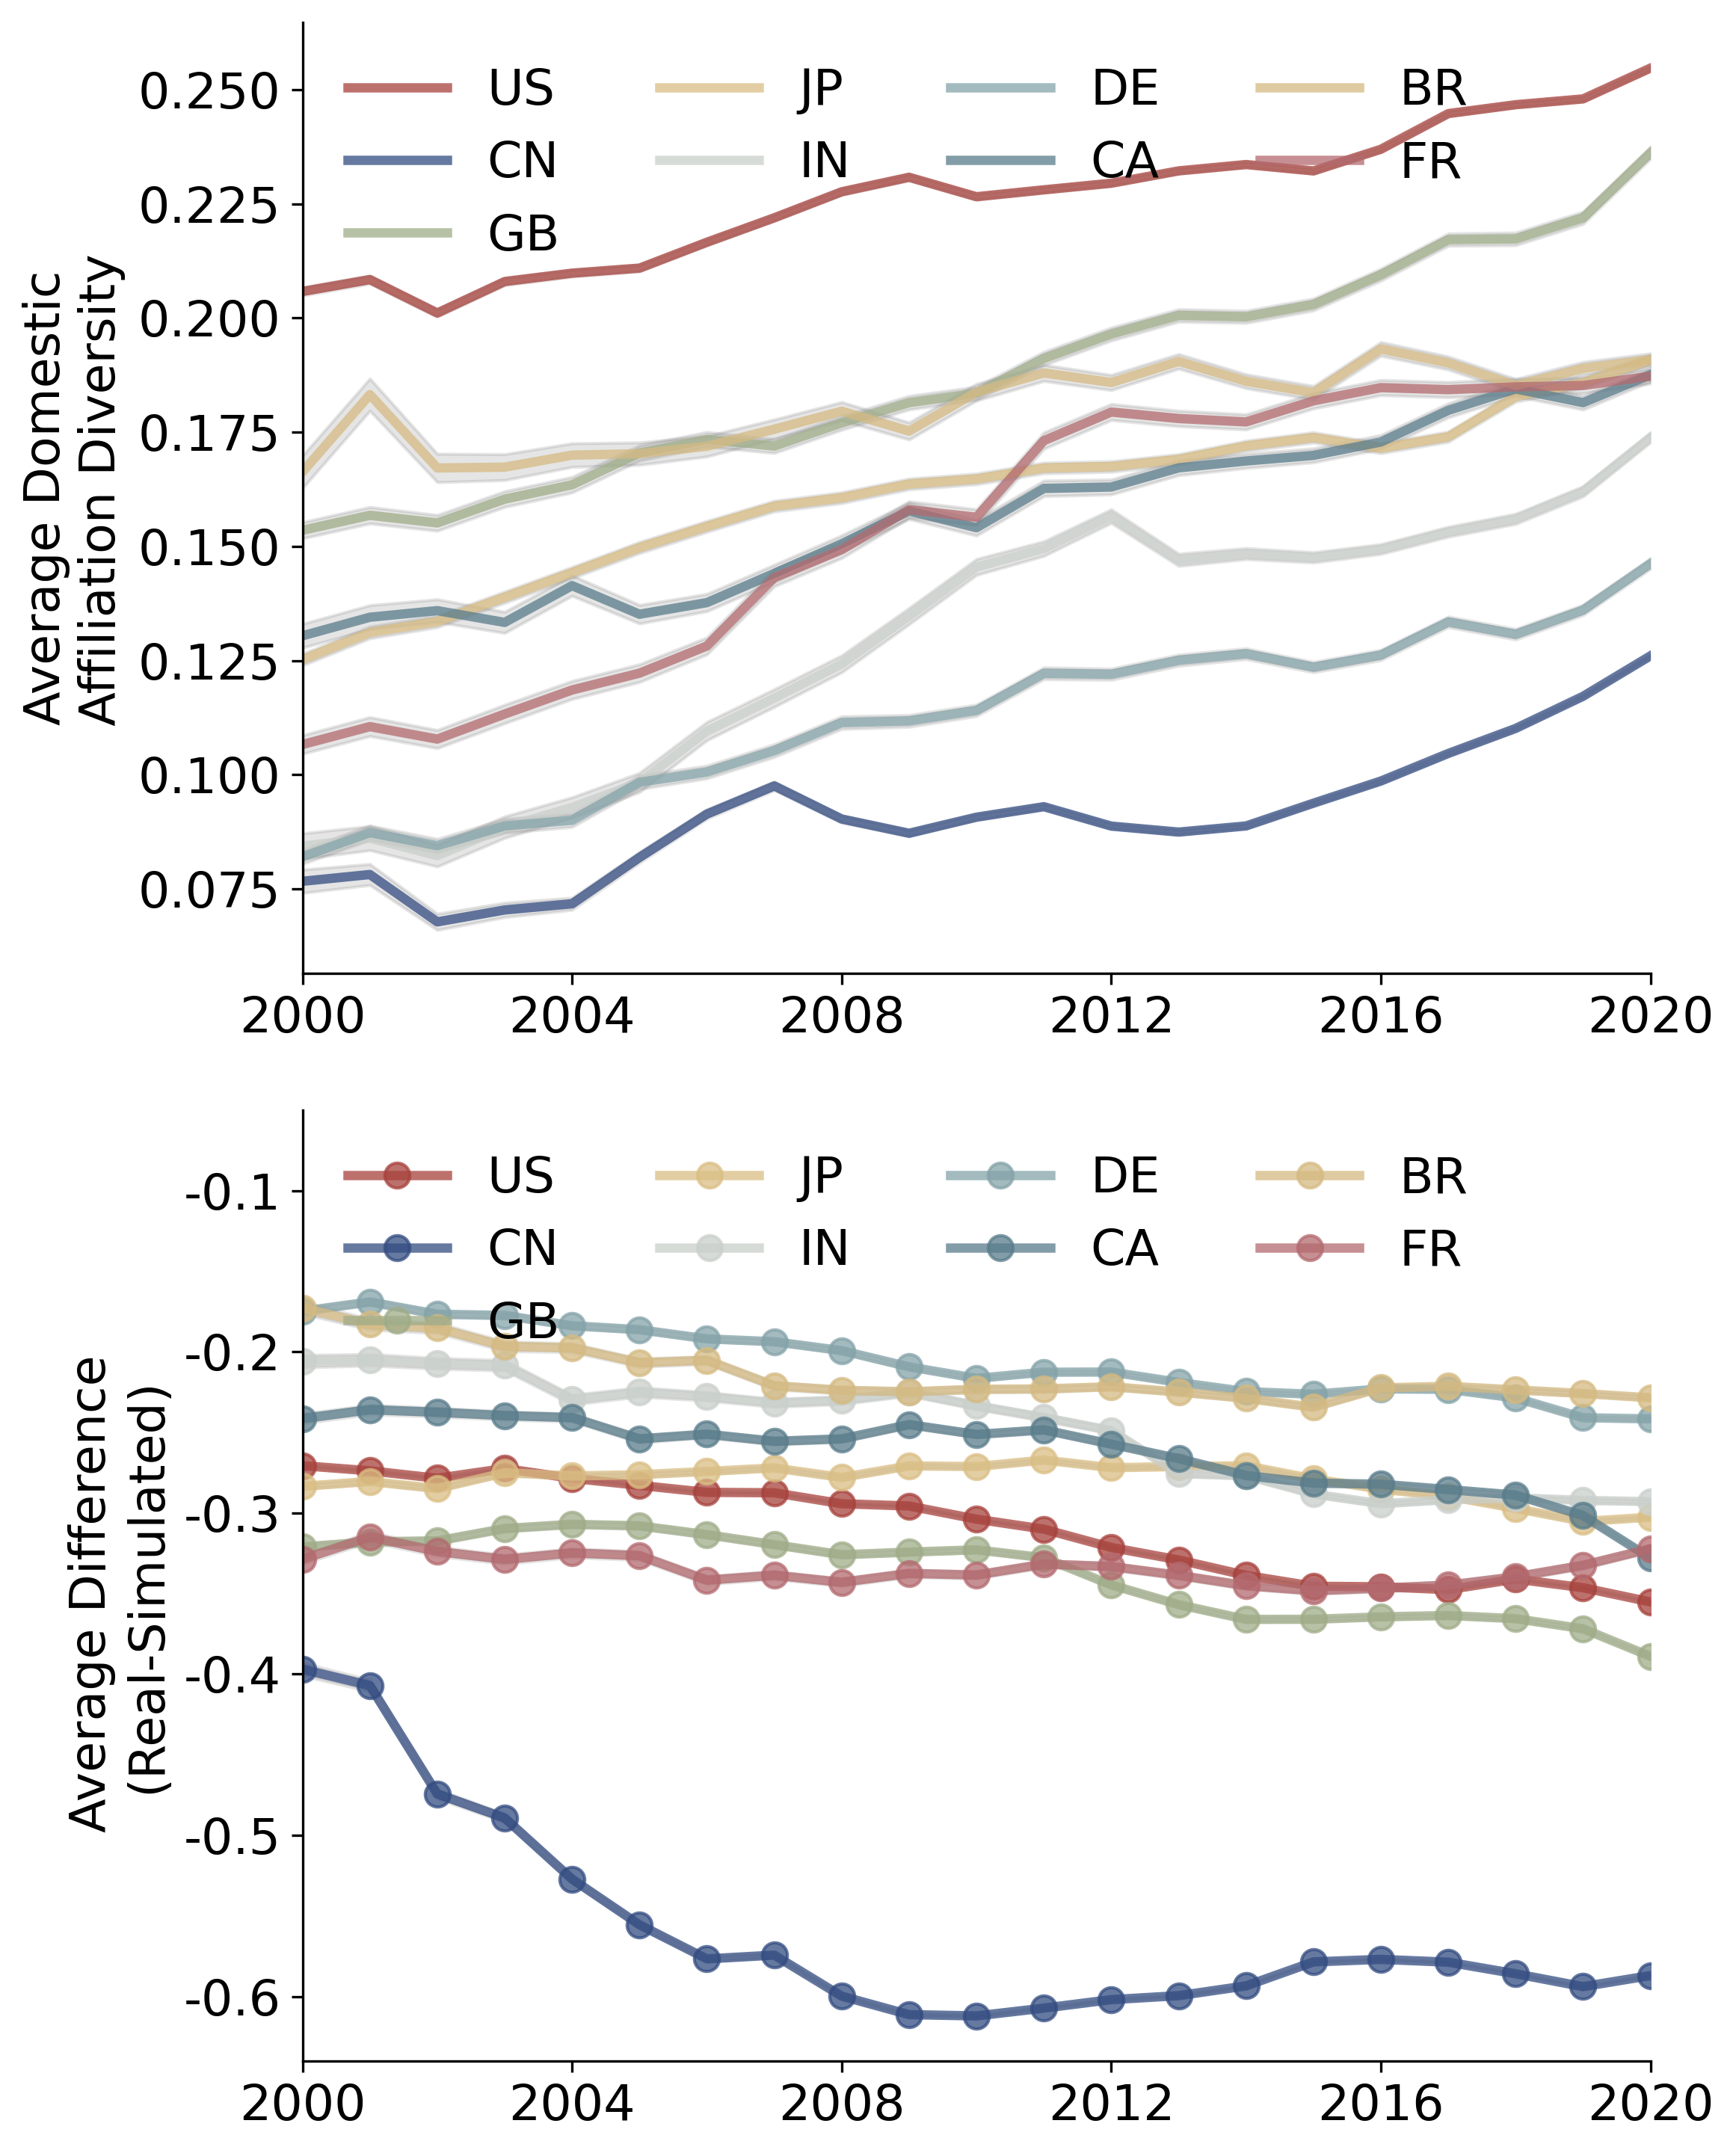

In [12]:
# fig 4a & 4b

df_9_country = df_y[df_y["country"].isin(['US', 'CN', 'GB', 'JP', 'IN', 'DE', 'CA', 'BR', 'FR'])]

import matplotlib.pyplot as plt
import pandas as pd

# Define color scheme for plotting
#co=["#a7413c","#334c81","#9FAC88","#DABE84","pink","blue","#597C8B","#d5ba82","#B36A6F"]
co = ["#a7413c", "#334c81", "#9FAC88", "#DABE84", "#CAD0CC", "#84A3A9", "#597C8B", "#d5ba82", "#B36A6F"]

# Create a figure with 2 rows and 1 column of subplots, set the size and DPI
# and get the references to the subplots (ax1 and ax2)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), dpi=300)
# Set the face color of the figure to white
fig.patch.set_facecolor('white')
# Set the sans-serif font to "Times New Roman" for the plot
plt.rcParams['font.sans-serif'] = "DejaVu Sans"
# Disable special handling of minus signs on axes
plt.rcParams['axes.unicode_minus'] = False
# List of countries to be plotted
Country = ['US', 'CN', 'GB', 'JP', 'IN', 'DE', 'CA', 'BR', 'FR']

# Data processing and plotting for the first subplot (entropy_f_t)
# Iterate over each country in the Country list
for idx, country in enumerate(Country):
    # Filter the df_9_country DataFrame to get data for the current country
    df = df_9_country[df_9_country['country'] == country]
    # Group the data by publication year and calculate the mean and standard error of 'entropy_f_t'
    yearly_stats = df.groupby('year')['affiliation_diversity'].agg(['mean','sem'])
    # Get the years from the grouped data
    years = yearly_stats.index
    # Get the mean values from the grouped data
    means = yearly_stats['mean']
    # Get the standard error values from the grouped data
    stds = yearly_stats['sem']
    # Plot the mean values over years with specified color, alpha, linewidth, and linestyle
    ax1.plot(years, means, c=co[idx], alpha=0.75, linewidth=3, linestyle='-', label=country)
    # Fill the area between the mean plus and minus the standard error
    ax1.fill_between(years, means - stds, means + stds, alpha=0.2, color='grey')

# Customize the first subplot
#ax1.legend(ncol=4, loc='upper left', frameon=False, prop={'family': 'Times New Roman','size': 18})
# Set the y-axis label for the first subplot
ax1.set_ylabel('Average Domestic\n Affiliation Diversity', fontsize=16)
# Set the x-axis limits for the first subplot
ax1.set_xlim(2000, 2020)
# Set the x-axis tick locations for the first subplot
ax1.set_xticks(range(2000, 2021, 4))
# Set the legend for the first subplot with specified columns, location, and font properties
ax1.legend(ncol=4, loc='upper left', frameon=False, prop={'family': 'DejaVu Sans','size': 16})
# Set the tick label size for the first subplot
ax1.tick_params(labelsize=16)
# Hide the top spine of the first subplot
ax1.spines['top'].set_visible(False)
# Hide the right spine of the first subplot
ax1.spines['right'].set_visible(False)
# Turn off the gridlines for the first subplot
ax1.grid(False)

# Data processing and plotting for the second subplot (chazhi)
# Iterate over each country in the Country list
for idx, country in enumerate(Country):
    # Filter the df_9_country DataFrame to get data for the current country
    df = df_9_country[df_9_country['country'] == country]
    # Group the data by publication year and calculate the mean and standard error of 'chazhi'
    yearly_stats = df.groupby('year')['diff_diversity'].agg(['mean','sem'])
    # Get the years from the grouped data
    years = yearly_stats.index
    # Get the mean values from the grouped data
    means = yearly_stats['mean']
    # Get the standard error values from the grouped data
    stds = yearly_stats['sem']
    # Plot the mean values over years with specified color, alpha, linewidth, linestyle, marker, and markersize
    ax2.plot(years, means, c=co[idx], alpha=0.75, linewidth=3, linestyle='-', marker="o", markersize=8, label=country)
    # Fill the area between the mean plus and minus the standard error
    ax2.fill_between(years, means - stds, means + stds, alpha=0.2, color='grey')

# Customize the second subplot
# Set the legend for the second subplot with specified columns, location, and font properties
ax2.legend(ncol=4, loc='upper left', frameon=False, prop={'family': 'DejaVu Sans','size': 16})
# Set the y-axis label for the second subplot
ax2.set_ylabel('Average Difference \n(Real-Simulated)', fontsize=16)
# Set the x-axis limits for the second subplot
ax2.set_xlim(2000, 2020)
# Set the y-axis limits for the second subplot
ax2.set_ylim(-0.64, -0.05)
# Set the x-axis tick locations for the second subplot
ax2.set_xticks(range(2000, 2021, 4))
# Set the tick label size for the second subplot
ax2.tick_params(labelsize=16)
# Hide the top spine of the second subplot
ax2.spines['top'].set_visible(False)
# Hide the right spine of the second subplot
ax2.spines['right'].set_visible(False)
# Turn off the gridlines for the second subplot
ax2.grid(False)

# Adjust the layout of the subplots to avoid overlapping
plt.tight_layout()

plt.show()

# fig 4c

/var/folders/gs/zcjwrkbd7l30gfdf87_jxdtw0000gn/T/ipykernel_56935/216186451.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["teamsize"] = df_filtered["teamsize"].astype(int)
/var/folders/gs/zcjwrkbd7l30gfdf87_jxdtw0000gn/T/ipykernel_56935/216186451.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["year"] = df_filtered["year"].astype(int)
/var/folders/gs/zcjwrkbd7l30gfdf87_jxdtw0000gn/T/ipykernel_56935/216186451.py:38: SettingWithCopyWarning: 
A value is trying to be set on a 

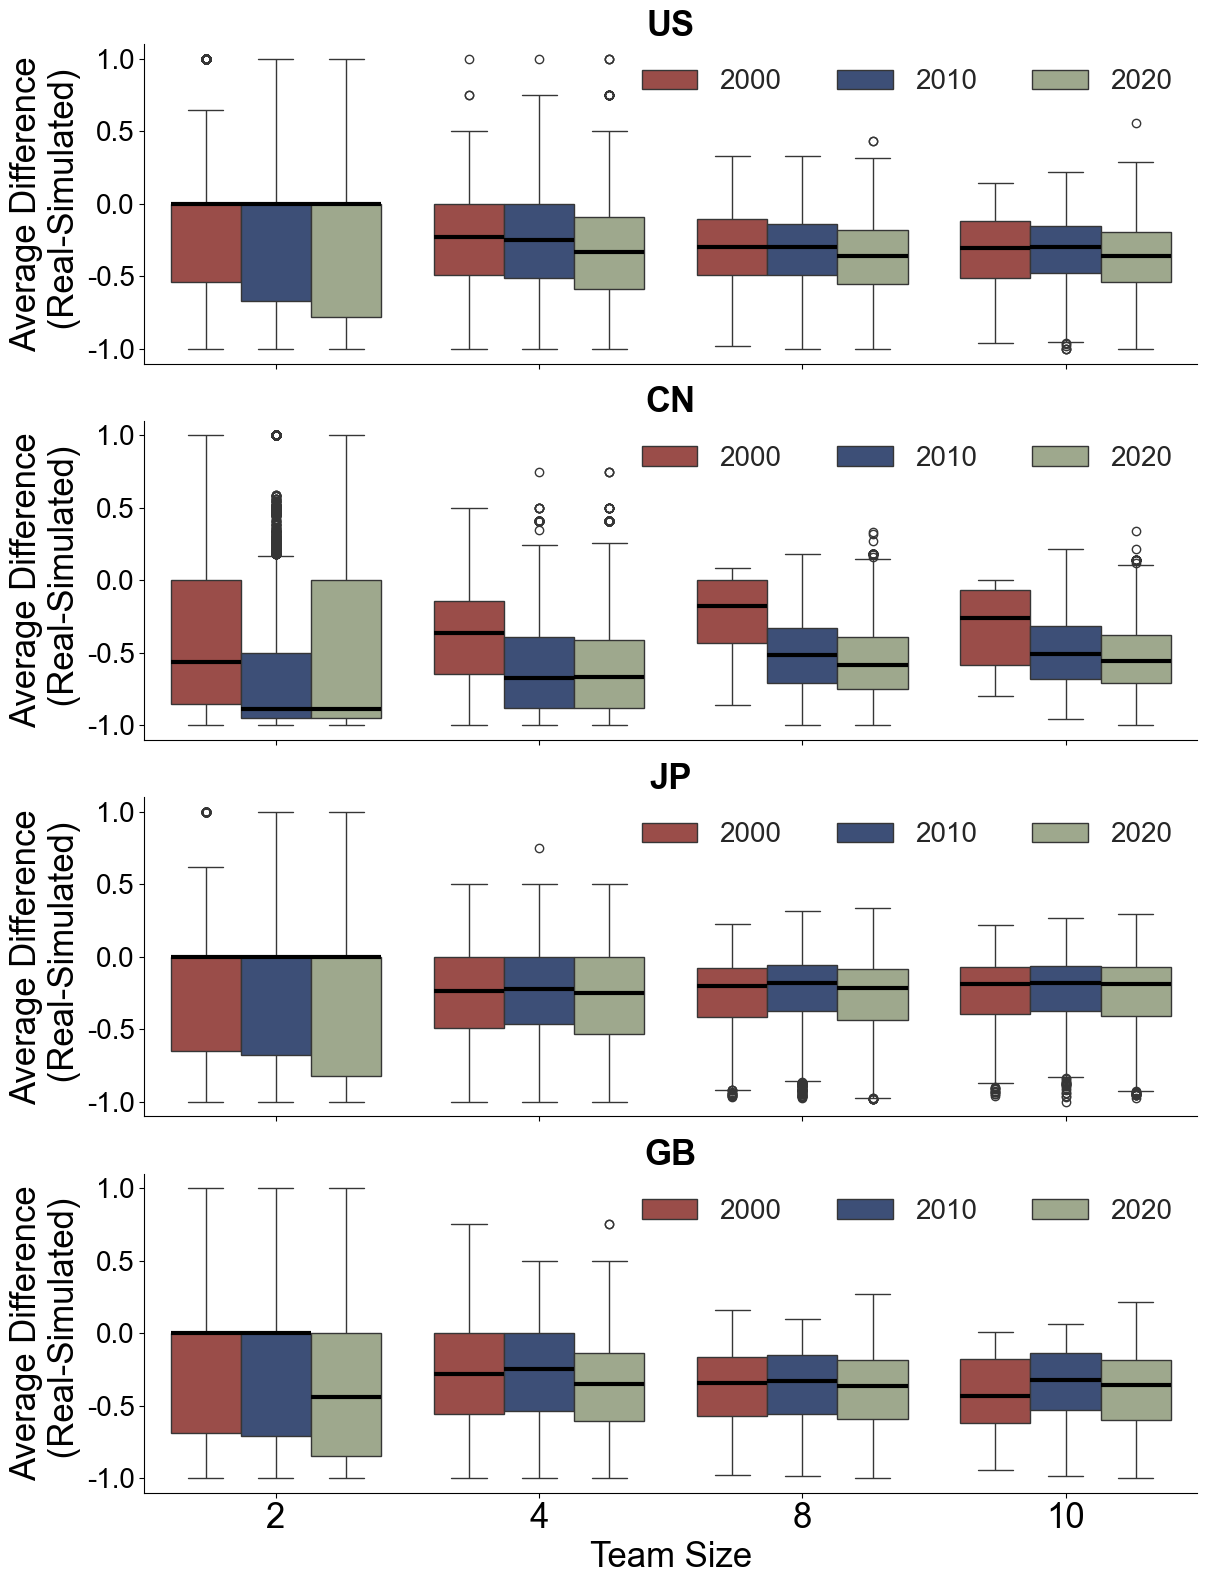

In [14]:
# fig 4c
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create lists of DataFrames for each country by filtering df_4_country
dfs = [df_9_country[df_9_country['country'] == 'US'], 
       df_9_country[df_9_country['country'] == 'CN'], 
       df_9_country[df_9_country['country'] == 'JP'], 
       df_9_country[df_9_country['country'] == 'GB']]
# Labels for each country corresponding to the DataFrames in dfs
labels = ['US', 'CN', 'JP', "GB"]

# List of team sizes to filter the data
teamsize = [2, 4, 8, 10]
# List of years to filter the data
years = [2000, 2010, 2020]

# List of colors for the boxplots
colors = ["#a7413c", "#334c81", "#9FAC88"]
# List used to set uniform intervals on the x-axis
num = [1, 2, 3, 4]  

# Create a figure and a grid of subplots with 4 rows and 1 column
# Set the figure size, and share the x and y axes among subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True, sharey=True)

# Set the style for the boxplots (white grid background)
sns.set(style="whitegrid")

# Iterate over the subplots, DataFrames, and labels to draw boxplots for each country
for ax, df, label in zip(axes, dfs, labels):
    # Filter the DataFrame to include only the specified team sizes and years
    df_filtered = df[df['teamsize'].isin(teamsize) & df['year'].isin(years)]
    # Convert the 'teamsize' and 'publishment_year' columns to integer type
    df_filtered["teamsize"] = df_filtered["teamsize"].astype(int)
    df_filtered["year"] = df_filtered["year"].astype(int)
    # Draw the boxplot with specified x, y, hue, data, and other properties
    sns.boxplot(x='teamsize', y='diff_diversity', hue='year', data=df_filtered, 
                ax=ax, palette=colors, dodge=True, medianprops={'linewidth': 3, 'color': 'black'})

    # Set the title for the subplot with the country label
    ax.set_title(f'{label}', fontsize=25, fontweight="bold")
    # Set the x-axis label
    ax.set_xlabel('Team Size', fontsize=25)
    # Set the y-axis label
    ax.set_ylabel('Average Difference\n (Real-Simulated)', fontsize=25)

    # Set the tick label size for the x-axis
    ax.tick_params(axis='x', labelsize=25)
    # Set the tick label size for the y-axis
    ax.tick_params(axis='y', labelsize=20)

    # Hide the top and right spines of the subplot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set the legend for the subplot with specified location, number of columns, font size, and no frame
    ax.legend(loc='upper right', ncol=3, fontsize=20, frameon=False)
    # Turn off the gridlines for the subplot
    ax.grid(False)

# Automatically adjust the spacing between subplots
plt.tight_layout()

# Display the figure

plt.show()


# fig 4d

/var/folders/gs/zcjwrkbd7l30gfdf87_jxdtw0000gn/T/ipykernel_56935/1894892703.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = filtered_df["year"].astype(int)
/var/folders/gs/zcjwrkbd7l30gfdf87_jxdtw0000gn/T/ipykernel_56935/1894892703.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = filtered_df["year"].astype(int)
/var/folders/gs/zcjwrkbd7l30gfdf87_jxdtw0000gn/T/ipykernel_56935/1894892703.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy 

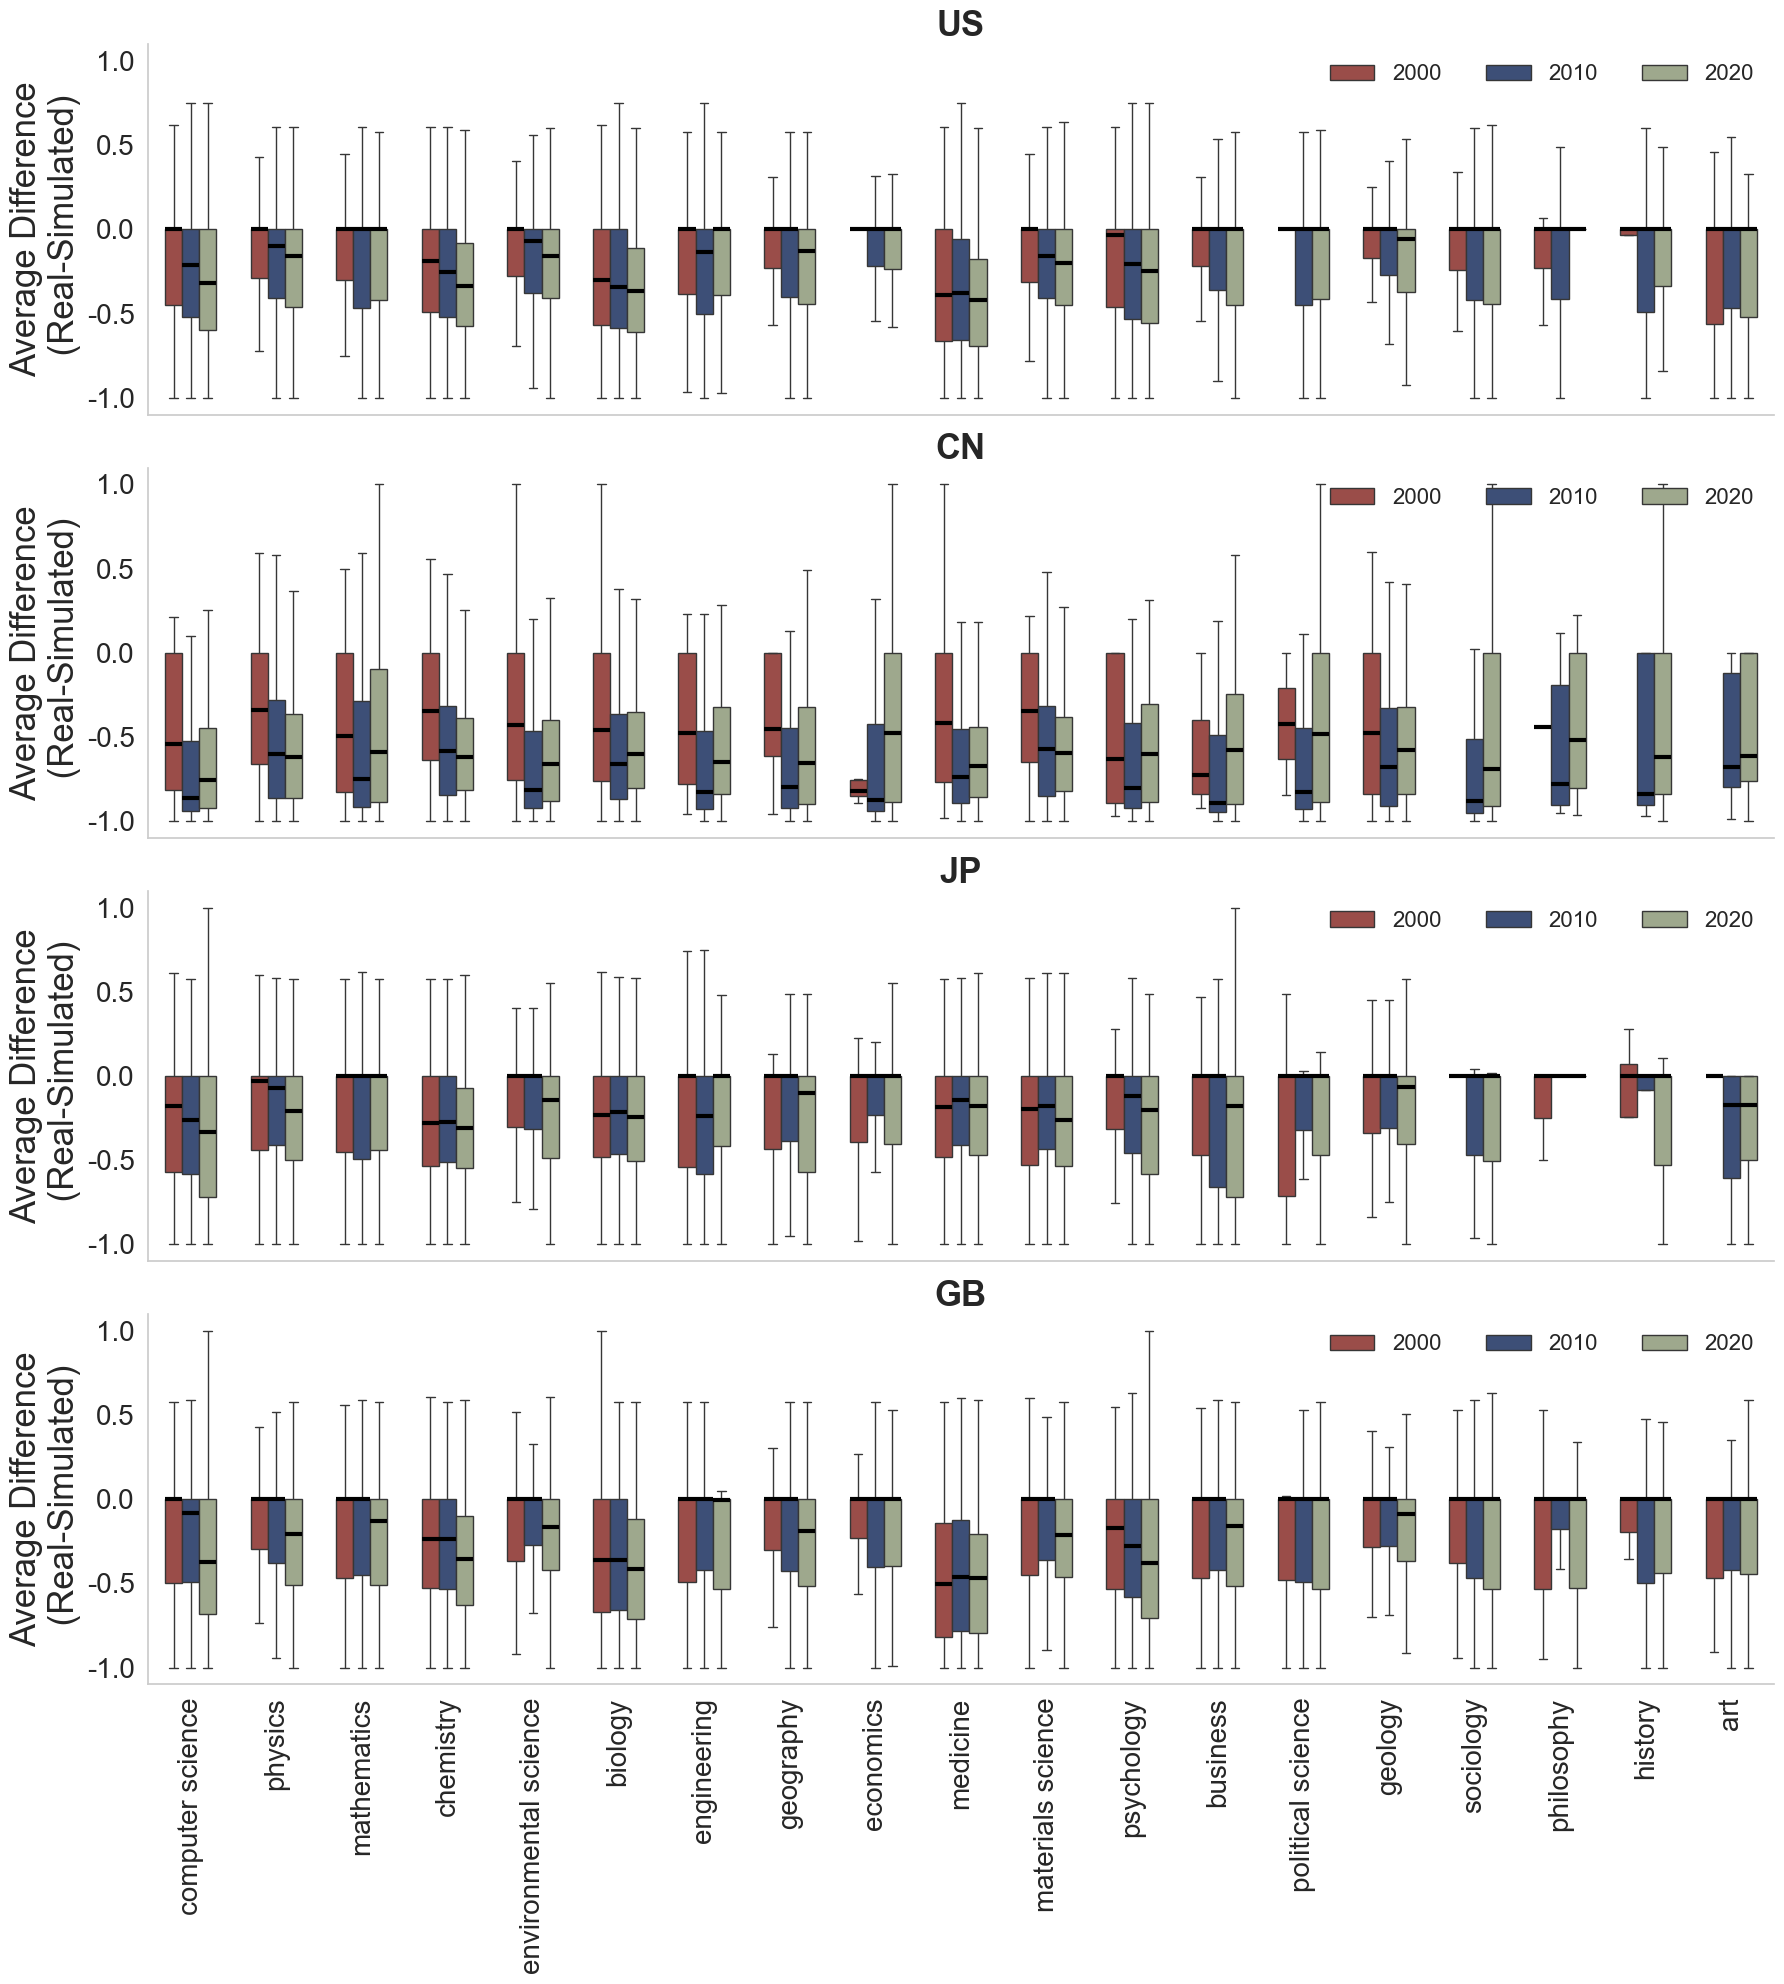

In [16]:
# fig 4d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# by filtering df_9_country based on the 'country' column
dfs = [df_9_country[df_9_country['country'] == 'US'], 
       df_9_country[df_9_country['country'] == 'CN'], 
       df_9_country[df_9_country['country'] == 'JP'], 
       df_9_country[df_9_country['country'] == 'GB']]

# Labels corresponding to each country's DataFrame in the 'dfs' list
labels = ['US', 'CN', 'JP', "GB"]

# Determine the top 19 fields by the number of unique paper IDs for each level_string
# Group by 'level_string' and count the unique 'paperid' values, then sort and select the top 19
fields = top_n_values_level = df_y.groupby('field_string')['paper_id'].nunique().sort_values(ascending=False).head(19).index
# List of years to filter the data
years = [2000, 2010, 2020]

# Create a figure with a grid of subplots (4 rows and 1 column)
# Set the figure size and share the x and y axes among subplots
fig, axes = plt.subplots(4, 1, figsize=(18, 20), sharex=True, sharey=True)

# Define a list of colors to be used for different years in the boxplots
colors = ["#a7413c", "#334c81", "#9FAC88"]

# Iterate over the subplots, DataFrames, and labels to plot data for each country
for ax, df, label in zip(axes, dfs, labels):
    # Filter the DataFrame to include only rows with the specified fields and years
    filtered_df = df[df['field_string'].isin(fields) & df['year'].isin(years)]
    
    # Convert the 'publishment_year' column to integer type
    filtered_df["year"] = filtered_df["year"].astype(int)
    # Create a boxplot with 'level_string' on the x-axis, 'chazhi' on the y-axis,
    # and 'publishment_year' as the hue. Use the specified colors, and customize other properties.
    sns.boxplot(x='field_string', y='diff_diversity', hue='year', 
                data=filtered_df, ax=ax, palette=colors, showfliers=False, width=0.6, medianprops={'linewidth': 3, 'color': 'black'})

    # Set the title of the subplot with the country label
    ax.set_title(f'{label}', fontsize=25, fontweight="bold")
    # Set the x-axis label (empty string in this case)
    ax.set_xlabel('', fontsize=25)
    # Set the y-axis label
    ax.set_ylabel('Average Difference\n (Real-Simulated)', fontsize=25)

    # Customize the tick labels for the x-axis (rotate by 90 degrees and set size)
    ax.tick_params(axis='x', labelsize=20, rotation=90)
    # Customize the tick labels for the y-axis (set size)
    ax.tick_params(axis='y', labelsize=20)
    #ax.set_xticklabels(fields)
    # Set the legend at the upper right corner with specified font size, no frame, and 3 columns
    ax.legend(loc='upper right', fontsize=16, frameon=False, ncol=3)
    # Hide the top and right spines of the subplot for better aesthetics
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Turn off the gridlines for the subplot
    ax.grid(False)

# Adjust the layout of the subplots to prevent overlapping
plt.tight_layout()

# Save the figure as an image file with specified DPI and bbox settings

plt.show()


# fig 5

In [18]:
#fig 5
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(dpi=500, figsize=(30, 18))
fig.patch.set_facecolor('white')

# Set the font properties for mathematical text, sans-serif text, and handle minus signs on axes
# Use 'cm' as the fontset for mathematical text
plt.rcParams['mathtext.fontset'] = 'cm'

# Set the sans-serif font to "DejaVu Sans"
plt.rcParams['font.sans-serif'] = ["DejaVu Sans"]

# Disable special handling of minus signs on axes
plt.rcParams['axes.unicode_minus'] = False


# Define a list of colors for plotting
co = ["#a7413c", "#334c81", "#9FAC88", "#DABE84", "#CAD0CC", "#84A3A9", "#597C8B", "#d5ba82", "#B36A6F"]


# Prepare data by filtering the DataFrame df_y based on publication year and team size
# Filter df_y to include rows where the publication year is less than or equal to 2017
df_y1 = df_y[df_y["year"] <= 2017]

# Filter df_y to include rows where the team size is 2 and the publication year is less than or equal to 2017
df_num_teamsize2 = df_y[(df_y["teamsize"] == 2) & (df_y["year"] <= 2017)]

# Filter df_y to include rows where the team size is 4 and the publication year is less than or equal to 2017
df_num_teamsize4 = df_y[(df_y["teamsize"] == 4) & (df_y["year"] <= 2017)]

# Filter df_y to include rows where the team size is 8 and the publication year is less than or equal to 2017
df_num_teamsize8 = df_y[(df_y["teamsize"] == 8) & (df_y["year"] <= 2017)]


# Define the bins for data grouping and the corresponding labels
bins = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
bin_lable = ["0", " ", "0.2", "", "0.4", " ", "0.6", " ", "0.8", " ", "1"]

# Define a function to plot a subplot
# dataframe: The DataFrame containing the data to be plotted
# metric: The column name in the DataFrame representing the metric to be plotted
# subplot_index: The index of the subplot in the overall grid
# color: The color to use for the bars in the subplot
# label: The label for the subplot (used in the title and legend)
def plot_subplot(dataframe, metric, subplot_index, color, label):

    # Create a subplot in a 3x4 grid with the given index
    plt.subplot(3, 4, subplot_index)


    # Convert the 'entropy_right' column data to a numpy array
    entropy_data = np.array(dataframe["affiliation_diversity"].tolist())

    # Convert the data of the specified metric column to a numpy array
    metric_data = np.array(dataframe[metric].tolist())


    # Lists to store the mean and error values for each bin
    bin_means = []
    bin_errors = []


    # Iterate over each bin to calculate the mean and standard error of the metric data within the bin
    for i in range(len(bins) - 1):

        # Create a mask to select data within the current bin
        bin_mask = (entropy_data >= bins[i]) & (entropy_data < bins[i + 1])

        # Select the metric data within the current bin
        bin_values = metric_data[bin_mask]

        # Calculate the mean of the bin values, or set it to 0 if there are no values in the bin
        bin_mean = np.mean(bin_values) if bin_values.size > 0 else 0

        # Calculate the standard error of the bin values, or set it to 0 if there are no values in the bin
        bin_se = np.std(bin_values, ddof=1) / np.sqrt(len(bin_values)) if bin_values.size > 0 else 0
        bin_means.append(bin_mean)
        bin_errors.append(bin_se)


    # Set the width of the bars and their positions
    bar_width = 0.05
    bar_positions = bins[:-1] + bar_width / 2

    # Plot the bars with the calculated means, errors, color, and other properties
    plt.bar(bar_positions, bin_means, width=bar_width, yerr=bin_errors, color=color, alpha=0.75, capsize=5, edgecolor='black', label=label)


    # Set the size of the x and y tick labels
    plt.xticks(size=30)
    plt.yticks(size=30)

    # Set the x tick positions and labels
    plt.xticks(bins[:-1] + bar_width / 2, labels=bin_lable, fontsize=30)

    # Set the title of the subplot with the given label
    plt.title(f'{label}', fontsize=35, fontweight="bold")

    # Set the x-axis label with the specified font properties
    plt.xlabel('Domestic Affiliation Diversity', fontdict={'family': 'DejaVu Sans','size': 35})

    # Set the y-axis label with the specified metric and font properties
    plt.ylabel(f'{metric}', fontsize=35, fontdict={'family': 'DejaVu Sans','size': 35})


    # Customize the y-axis label for specific metrics
    if metric == "c3":
        plt.ylabel('C$_3$', fontsize=35)
    elif metric == "c10":
        plt.ylabel('C$_{10}$', fontsize=35)
    elif metric == "top5":
        plt.ylabel('Hit paper', fontsize=35)

    # Hide the right and top spines of the subplot
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.grid(False)



# Plot each subplot using the defined function with different data and settings
# Plot for overall data with metric "c3"
plot_subplot(df_y1, "c3", 1, co[0], "Overall")

# Plot for data with team size 2 and metric "c3"
plot_subplot(df_num_teamsize2, "c3", 2, co[1], "Team size=2")

# Plot for data with team size 4 and metric "c3"
plot_subplot(df_num_teamsize4, "c3", 3, co[2], "Team size=4")

# Plot for data with team size 8 and metric "c3"
plot_subplot(df_num_teamsize8, "c3", 4, co[3], "Team size=8")


# Update the data filtering for the next set of subplots based on publication year
df_y1 = df_y[df_y["year"] <= 2010]
df_num_teamsize2 = df_y[(df_y["teamsize"] == 2) & (df_y["year"] <= 2010)]
df_num_teamsize4 = df_y[(df_y["teamsize"] == 4) & (df_y["year"] <= 2010)]
df_num_teamsize8 = df_y[(df_y["teamsize"] == 8) & (df_y["year"] <= 2010)]


# Plot for overall data with metric "c10"
plot_subplot(df_y1, "c10", 5, co[0], "Overall")

# Plot for data with team size 2 and metric "c10"
plot_subplot(df_num_teamsize2, "c10", 6, co[1], "Team size=2")

# Plot for data with team size 4 and metric "c10"
plot_subplot(df_num_teamsize4, "c10", 7, co[2], "Team size=4")

# Plot for data with team size 8 and metric "c10"
plot_subplot(df_num_teamsize8, "c10", 8, co[3], "Team size=8")


# Update the data filtering for the last set of subplots based on team size
df_num_teamsize2 = df_y[df_y["teamsize"] == 2]
df_num_teamsize4 = df_y[df_y["teamsize"] == 4]
df_num_teamsize8 = df_y[df_y["teamsize"] == 8]


# Plot for overall data with metric "whether_top5%"
plot_subplot(df_y, "top5", 9, co[0], "Overall")

# Plot for data with team size 2 and metric "top5%"
plot_subplot(df_num_teamsize2, "top5", 10, co[1], "Team size=2")

# Plot for data with team size 4 and metric "top5%"
plot_subplot(df_num_teamsize4, "top5", 11, co[2], "Team size=4")

# Plot for data with team size 8 and metric "top5%"
plot_subplot(df_num_teamsize8, "top5", 12, co[3], "Team size=8")


# Automatically adjust the spacing between subplots to avoid overlapping
plt.tight_layout()

# Display the figure
plt.show()


# fig 6

## The data_dict dictionary contains the coefficients and standard errors of the regression export table for Figure 6 in the Stata_code file.

In [ ]:
# fig 6
import matplotlib.pyplot as plt
import numpy as np

#The data_dict dictionary contains the coefficients and standard errors of the regression export table for Figure 6 in the Stata_code file.

# Import the NumPy library for numerical operations
import numpy as np
# Import the pyplot module from the Matplotlib library for plotting
import matplotlib.pyplot as plt

# Define a color scheme for the plots
co = ["#a7413c", "#334c81", "#9FAC88", "#CAD0CC", "#DABE84", "#84A3A9", "#597C8B", "#d5ba82", "#B36A6F"]

# Define a list of countries to be plotted
countries = ["Overall", "US", "CN", "JP", "GB"]

# Create a figure and a grid of subplots with 5 rows and 3 columns
# The subplots share the x-axis, and the figure size is set to (18, 16) inches
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 16), sharex=True)
# Adjust the vertical space between subplots
fig.subplots_adjust(hspace=0.4)

# Iterate over each country in the list of countries
for i, country in enumerate(countries):
    # Iterate over each metric (key-value pair) in the data dictionary
    for j, (label, dataset) in enumerate(data_dict.items()):
        # Select the current subplot
        ax = axes[i, j]
        
        # Find the data for the current country in the current dataset
        country_data = next((item for item in dataset if item[0] == country), None)
        # If data for the country is found
        if country_data:
            # Generate x-axis values starting from 2
            x = np.arange(2, len(country_data[1]) + 2)
            # Extract the y-axis values (mean values)
            y = country_data[1]
            # Extract the error values (standard error values)
            yerr = country_data[2]
            # Calculate the color index for the current metric
            color_idx = j % len(co) 
            
            # Plot the error bars on the current subplot
            ax.errorbar(x, y, yerr=yerr, fmt='o', color=co[color_idx], alpha=0.7, linewidth=3, 
                        elinewidth=2, capsize=4, label=label)
            # Draw a horizontal line at y = 0
            ax.axhline(0, color='grey', linestyle='--')
            
            # Set the title of the current subplot to the country name
            ax.set_title(f"{country}", fontsize=25, weight='bold')
            
            # Set the y-axis label
            ax.set_ylabel("Coef.", fontdict={'family': 'DejaVu Sans', 'size': 22})
            
            # Set the x-axis label
            ax.set_xlabel("Team size", fontdict={'family': 'DejaVu Sans', 'size': 25})
            
            # Set the font size of the major tick labels on both axes
            ax.tick_params(axis='both', which='major', labelsize=22)
            # Hide the right spine of the current subplot
            ax.spines['right'].set_visible(False)
            # Hide the top spine of the current subplot
            ax.spines['top'].set_visible(False)
            
            # Calculate the minimum and maximum y-axis values
            y_min = min(np.array(y) - np.array(yerr)) - 0.02
            y_max = max(np.array(y) + np.array(yerr)) + 0.02
            # Set the y-axis limits
            ax.set_ylim([y_min, y_max])
            
            # If it's the last row of subplots
            if i == len(countries) - 1:
                # Set the x-axis tick positions
                ax.set_xticks(x)
            ax.grid(False)

# Automatically adjust the subplot layout to fit the figure
plt.tight_layout()

# Display the figure
plt.show()

# Entropy & Randomized Model

In [ ]:
import numpy as np
import pandas as pd
import random
import math
from typing import List, Dict

# ---------------------------------- #
# Step 1: Compute Shannon Entropy
# ---------------------------------- #
def entropy(data: List[str]) -> float:
    """
    Compute Shannon entropy for a given dataset.

    Parameters:
        data (List[str]): A list of affiliation IDs for a given paper.

    Returns:
        float: Normalized Shannon entropy value.
    """
    if not data:
        return 0.0

    unique, counts = np.unique(data, return_counts=True)
    probabilities = counts / len(data)

    # Compute normalized entropy (ensuring max value is 1)
    return (-np.sum(probabilities * np.log2(probabilities))) / (np.log2(len(data))) if len(unique) > 1 else 0.0


# ---------------------------------- #
# Step 2: Calculate Entropy for Real Data
# ---------------------------------- #
def compute_real_entropy(paperid_affiliationid: Dict[str, List[str]]) -> pd.DataFrame:
    """
    Compute real entropy for each paper based on its true affiliations.

    Parameters:
        paperid_affiliationid (Dict[str, List[str]]): 
            Dictionary mapping paper IDs to lists of author affiliations.

    Returns:
        pd.DataFrame: DataFrame containing paper IDs and their entropy values.
    """
    paperid_entropy = {paperid: entropy(affiliations) for paperid, affiliations in paperid_affiliationid.items()}
    
    return pd.DataFrame({
        "paperid": list(paperid_entropy.keys()),
        "affiliation_diversity": list(paperid_entropy.values())
    })


# ---------------------------------- #
# Step 3: Get Available Affiliation IDs for Shuffling
# ---------------------------------- #
def get_affiliationid_list(authorid: str, paper_year: int, 
                           authorid_for_group: Dict[str, str], 
                           for_group_authorid: Dict[str, List[str]], 
                           year_authorid_affiliationid: Dict[str, Dict[int, List[str]]]) -> List[str]:
    """
    Retrieve available affiliation IDs for an author in a specific year.

    Parameters:
        authorid (str): Target author's ID.
        paper_year (int): Year of publication.
        authorid_for_group (Dict[str, str]): Mapping of authors to exchangeable groups.
        for_group_authorid (Dict[str, List[str]]): Mapping of groups to authors.
        year_authorid_affiliationid (Dict[str, Dict[int, List[str]]]): Mapping of authors to their affiliations over years.

    Returns:
        List[str]: List of available affiliation IDs for the author.
    """
    group = authorid_for_group.get(authorid)
    if not group:
        return []

    possible_exchange_authors = for_group_authorid.get(group, [])
    possible_affiliation_ids = set()

    for exchange_author in possible_exchange_authors:
        affiliations = year_authorid_affiliationid.get(exchange_author, {}).get(paper_year, [])
        possible_affiliation_ids.update(filter(lambda x: not (isinstance(x, float) and math.isnan(x)), affiliations))

    # If no affiliations found, use the author's own affiliations
    if not possible_affiliation_ids:
        possible_affiliation_ids.update(year_authorid_affiliationid.get(authorid, {}).get(paper_year, []))
    
    return list(possible_affiliation_ids)


# ---------------------------------- #
# Step 4: Compute Mean & Std Entropy after Shuffling
# ---------------------------------- #
def calculate_entropy(paperid: str, paperid_authorid: Dict[str, List[str]], 
                      paperid_year: Dict[str, int], authorid_for_group: Dict[str, str], 
                      for_group_authorid: Dict[str, List[str]], 
                      year_authorid_affiliationid: Dict[str, Dict[int, List[str]]]) -> (float, float):
    """
    Compute the mean and standard deviation of entropy after shuffling.

    Parameters:
        paperid (str): Paper ID.
        paperid_authorid (Dict[str, List[str]]): Mapping of paper IDs to author lists.
        paperid_year (Dict[str, int]): Mapping of paper IDs to publication years.
        authorid_for_group (Dict[str, str]): Mapping of authors to exchangeable groups.
        for_group_authorid (Dict[str, List[str]]): Mapping of groups to authors.
        year_authorid_affiliationid (Dict[str, Dict[int, List[str]]]): Mapping of authors to yearly affiliations.

    Returns:
        (float, float): Mean and standard deviation of entropy after 100 shuffles.
    """
    authors = paperid_authorid.get(paperid, [])
    paper_year = paperid_year.get(paperid)

    all_entropies = []

    for _ in range(100):  # Perform 100 shuffles
        shuffled_affiliation_ids = [
            random.choice(get_affiliationid_list(author, paper_year, authorid_for_group, for_group_authorid, year_authorid_affiliationid))
            for author in authors if get_affiliationid_list(author, paper_year, authorid_for_group, for_group_authorid, year_authorid_affiliationid)
        ]

        all_entropies.append(entropy(shuffled_affiliation_ids))

    return np.mean(all_entropies), np.std(all_entropies)


# ---------------------------------- #
# Step 5: Process All Papers
# ---------------------------------- #
def process_all_papers(paperid_authorid: Dict[str, List[str]], 
                       paperid_year: Dict[str, int], 
                       authorid_for_group: Dict[str, str], 
                       for_group_authorid: Dict[str, List[str]], 
                       year_authorid_affiliationid: Dict[str, Dict[int, List[str]]]) -> pd.DataFrame:
    """
    Process all papers and compute shuffled entropy statistics.

    Returns:
        pd.DataFrame: DataFrame containing entropy statistics.
    """
    data = {
        'paperid': [],
        'mean_affiliation_diversity_after_100shuffles': [],
        'std_affiliation_diversity': []
    }

    for paperid in paperid_authorid.keys():
        mean_entropy, std_entropy = calculate_entropy(paperid, paperid_authorid, paperid_year, authorid_for_group, for_group_authorid, year_authorid_affiliationid)
        data['paperid'].append(paperid)
        data['mean_affiliation_diversity_after_100shuffles'].append(mean_entropy)
        data['std_affiliation_diversity'].append(std_entropy)

    return pd.DataFrame(data)


# ---------------------------------- #
# Step 6: Example Usage
# ---------------------------------- #
if __name__ == "__main__":
    # Example Input Data
    paperid_authorid = {"p1": ["a1", "a2","a3"]}
    paperid_affid = {"p1": ["affid2", "affid2","affid3"]}
    paperid_year = {"p1": 2010}
    year_authorid_affiliationid = {
        "a1": {2010: ["affid1", "affid2"]}, "a2": {2010: ["affid3", "affid2"]},
        "a3": {2010: ["affid3"]}, "a4": {2010: ["affid3"]}, "a5": {2010: ["affid4"]}, "a6": {2010: ["affid5"]}
    }
    authorid_for_group = {"a1":"[1, 2)-2006.0-New York-192562407.0", "a2": "[4, 5)-2007.0-San Antonio-192562407.0","a3":"[2, 4)-2003.0-Chicago-192562407.0"}
    for_group_authorid = {
        "[1, 2)-2006.0-New York-192562407.0": ["a1", "a3", "a4"],
        "[4, 5)-2007.0-San Antonio-192562407.0": ["a2", "a5"],
        "[2, 4)-2003.0-Chicago-192562407.0": ["a3", "a6"]
    }


    # Compute Results
    df_entropy_real = compute_real_entropy(paperid_affid)
    df_entropy_stats = process_all_papers(paperid_authorid, paperid_year, authorid_for_group, for_group_authorid, year_authorid_affiliationid)

    # Merge Results
    df_entropy = pd.merge(df_entropy_real, df_entropy_stats, on="paperid", how="left")
    df_entropy["diff_diversity"] = df_entropy["affiliation_diversity"] - df_entropy["mean_affiliation_diversity_after_100shuffles"]

    print(df_entropy)

# Affiliation Contribution

In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict

# ---------------------------------- #
# Step 1: Helper Functions
# ---------------------------------- #
def get_authors_for_paper(paperid, paperid_authorid):
    """Retrieve authors for a given paper ID."""
    return paperid_authorid.get(paperid, [])

def get_citing_papers(paperid, paperid_cite_this_paperid):
    """Retrieve papers that cite the given paper ID."""
    return paperid_cite_this_paperid.get(paperid, [])

def get_references_for_citing_papers(paperid, paperid_cite_this_paperid, paperid_reference_paperid):
    """Retrieve reference papers for all papers that cite the given paper."""
    citing_papers = get_citing_papers(paperid, paperid_cite_this_paperid)
    if not citing_papers:
        return None

    references_dict = {citing_paper: paperid_reference_paperid.get(citing_paper, []) for citing_paper in citing_papers}
    return {k: v for k, v in references_dict.items() if v}

# ---------------------------------- #
# Step 2: Compute Weight Matrix (C)
# ---------------------------------- #
def calculate_weight_matrix(citing_papers, references_dict):
    """Compute the weight matrix C."""
    C = defaultdict(int)
    if citing_papers is None or references_dict is None:
        return C
    for refs in references_dict.values():
        for paper in refs:
            C[paper] += 1
    return dict(C)

# ---------------------------------- #
# Step 3: Compute Author Contribution Matrix (A)
# ---------------------------------- #
def calculate_author_contribution(authors, paperid_list, paperid_authorid):
    """Compute the author contribution matrix A."""
    author_contributions = {author: np.zeros(len(paperid_list)) for author in authors}
    for idx, paperid in enumerate(paperid_list):
        paper_authors = paperid_authorid.get(paperid, [])
        author_count = len(paper_authors)
        for author in authors:
            if author in paper_authors and author_count > 0:
                author_contributions[author][idx] = round(1 / author_count, 2)
    return author_contributions

# ---------------------------------- #
# Step 4: Compute Final Contribution Matrix (A * C)
# ---------------------------------- #
def calculate_and_normalize_contributions(C, A):
    """Compute the final contribution matrix A * C."""
    if not C:
        return {}

    C_matrix = np.array(list(C.values())).reshape(-1, 1)
    A_keys, A_values = zip(*A.items()) if A else ([], [])
    A_matrix = np.array(A_values) if A_values else np.array([])

    if A_matrix.size == 0:
        return {}

    result_matrix = np.dot(A_matrix, C_matrix)
    normalized_result = result_matrix / np.sum(result_matrix) if np.sum(result_matrix) > 0 else result_matrix

    return {author: normalized_result[i, 0] for i, author in enumerate(A_keys)}

# ---------------------------------- #
# Step 5: Process All Papers
# ---------------------------------- #
def process_papers(paper_ids, paperid_authorid, paperid_cite_this_paperid, paperid_reference_paperid):
    """Compute author contributions for all papers."""
    paperid_contribution = {}

    for paperid in paper_ids:
        citing_papers = get_citing_papers(paperid, paperid_cite_this_paperid)
        references_dict = get_references_for_citing_papers(paperid, paperid_cite_this_paperid, paperid_reference_paperid)
        C = calculate_weight_matrix(citing_papers, references_dict)
        authors = get_authors_for_paper(paperid, paperid_authorid)
        paperid_list = list(C.keys())
        A = calculate_author_contribution(authors, paperid_list, paperid_authorid)
        normalized_contributions = calculate_and_normalize_contributions(C, A)
        paperid_contribution[paperid] = normalized_contributions

    rows = [{'paperid': paperid, 'authorid': authorid, 'contribution': contribution}
            for paperid, contributions in paperid_contribution.items() for authorid, contribution in contributions.items()]
    
    return pd.DataFrame(rows)

# ---------------------------------- #
# Step 6: Example Run & Affiliation Processing
# ---------------------------------- #
if __name__ == "__main__":
    # Example Data
    paperid_authorid = {
        "P1": ["A1", "A2", "A3"],
        "P2": ["A2", "A3"],
        "P3": ["A3", "A4"],
        "P4": ["A1", "A4"]
    }

    paperid_cite_this_paperid = {
        "P1": ["P2", "P3"],
        "P2": ["P3", "P4"],
        "P3": ["P4"]
    }

    paperid_reference_paperid = {
        "P2": ["P1"],
        "P3": ["P1", "P2"],
        "P4": ["P2", "P3"]
    }

    CIC_paperid = ["P1","P2","P3"]

    # Process Papers
    df_contribution = process_papers(CIC_paperid, paperid_authorid, paperid_cite_this_paperid, paperid_reference_paperid)

    # Example Affiliation Data
    df_paper_author_aff = pd.DataFrame({
        'paperid': ["P1", "P1", "P2", "P2", "P3", "P3"],
        'authorid': ["A1", "A2", "A2", "A3", "A3", "A4"],
        'affiliationid': ["Aff1", "Aff2", "Aff2", "Aff3", "Aff3", "Aff4"]
    })

    # Merge author contributions with affiliations
    df_contribution_aff = pd.merge(df_paper_author_aff, df_contribution, on=["paperid", "authorid"], how="left")

    # Sum contributions by affiliation for each paper
    sum_contributions = df_contribution_aff.groupby(['paperid', 'affiliationid'])['contribution'].sum().reset_index(name='sum_contribution')

    # Find the affiliation with the highest contribution for each paper
    idx = sum_contributions.groupby(['paperid'])['sum_contribution'].transform(max) == sum_contributions['sum_contribution']
    max_contrib_affil = sum_contributions[idx]

    # Rename columns for clarity
    max_contrib_affil.rename(columns={'affiliationid': 'max_contribution_affid', 'sum_contribution': 'contribution'}, inplace=True)

    # Display results
    print(max_contrib_affil)